In [29]:

import random
import pandas as pd
import numpy as np
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import datetime

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from statsmodels.formula.api  import ols
import statsmodels.api as sm

from scipy import stats
from datetime import datetime
from scipy.stats import pearsonr

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot

from pylab import rcParams
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
# Load data 

p = 0.1  # randomly take 10% of the rows in the data
# keep the header, then take only 1% of lines
# if random from [0,1] interval is greater than 0.01 the row will be skipped
df = pd.read_csv(
         r'/Users/cairo/Google Drive/wechat data/TopicOutcomeAll20Topic.csv',
         header=0, 
         skiprows=lambda i: i>0 and random.random() > p)

df.drop(['summary', 'url', 'sourceUrl', 'videoUrl', 'audioUrl', 'musicUrl', 'imageUrl','type'], axis=1)




,name,account,author,title,likeCount,clicksCount,publicTime,orderNum,originalFlag,updateTime,...,topic10,topic11,topic12,topic13,topic14,topic15,topic16,topic17,topic18,topic19
0,Dispatch,DispatchDaily@qianyi,星明网韩娱速递,震惊！！你知道为什么男孩要自杀吗？知道真相的你眼泪掉下来。。。,49,8220,2015-01-05 17:51:53,7,0,2015-01-12 11:05:20,...,3.424152,0.050000,0.050000,0.050000,74.215640,15.149483,0.050000,0.05,0.05000,0.050000
1,南京吃喝玩乐,happyinnanjing,南京吃喝玩乐,南京人童年殿堂级零食 你吃过多少？,50,11997,2015-01-12 08:13:15,4,0,2015-01-19 12:25:47,...,0.050000,0.050000,0.050000,0.050000,0.050000,10.749091,0.050000,0.05,362.86260,2.034984
2,国学精粹与生活艺术,gxjhshys,国学精粹与生活艺术,毛泽东晚年对邓小平、华国锋的惊人预言,721,100001,2015-01-06 06:54:06,7,0,2015-01-12 13:11:44,...,0.050000,12.922502,0.050000,3.113142,0.050000,17.924192,40.139732,0.05,0.05000,0.050000
3,国学精粹与生活艺术,gxjhshys,国学精粹与生活艺术,如何找到自己内在的力量？,243,56070,2015-01-08 07:00:46,2,0,2015-01-12 13:11:33,...,0.050000,0.050000,0.050000,0.050000,0.050000,230.657330,56.966890,0.05,0.05000,0.050000
4,南京吃喝玩乐,happyinnanjing,南京吃喝玩乐,㊙少吃调料竟然是错的！这9种调料原来是长寿高手！,84,13949,2015-01-16 23:45:00,2,0,2015-01-26 16:34:36,...,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.05,0.05000,0.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553291,中国搜索,chinaso_com,中国搜索,来了，新闻早茶！,250,13724,2019-09-20 07:25:59,1,0,2019-09-23 11:56:45,...,0.050000,0.050000,8.890233,0.050000,26.461536,0.050000,0.050000,0.05,0.05000,0.050000
553292,正能量,znl116,正能量,最干净的几句话，高明！,295,23745,2019-09-20 21:34:42,3,0,2019-09-29 18:26:53,...,0.050000,6.360763,0.050000,0.050000,0.050000,0.050000,13.708878,0.05,0.05000,0.050000
553293,小警之家,gh_462cb74fd375,小警之家,公安办案重大改革！,59,38094,2019-09-18 17:06:40,1,0,2019-09-21 13:07:55,...,0.050000,0.050000,0.050000,0.050000,442.418950,0.050000,0.050000,0.05,0.05000,0.050000
553294,上海本地宝,shbendibao,上海本地宝,上海十一活动汇总！小笼文化展、魔术节、夜市灯会...精彩多多！,15,18762,2019-09-30 12:12:46,2,0,2019-10-03 14:43:32,...,0.050000,0.050000,0.050000,583.816700,0.050000,0.050000,0.050000,0.05,69.59108,0.050000


## Analyze the time series with day as the time unit

In [200]:
df.likeCount = pd.to_numeric(df["likeCount"], downcast="float")
df["datetime"] = pd.to_datetime(df["publicTime"])
df['date'] = df['datetime'].dt.date

likecount_bydate = df.groupby(["date"])[['likeCount']].mean()


In [201]:
likecount_bydate = likecount_bydate.rename(columns={'likeCount': 'Observed'})
likecount_bydate


,Observed
date,
2014-09-01,76.871796
2014-09-02,55.684212
2014-09-03,41.692307
2014-09-04,512.023804
2014-09-05,166.852936
...,...
2019-11-29,217.943359
2019-11-30,287.530334
2019-12-01,201.569092


In [263]:
# train test split
train_size = int(len(likecount_bydate) * 0.7)
trainset, testset= likecount_bydate[0:train_size], likecount_bydate[train_size:]

### Naive model forecast

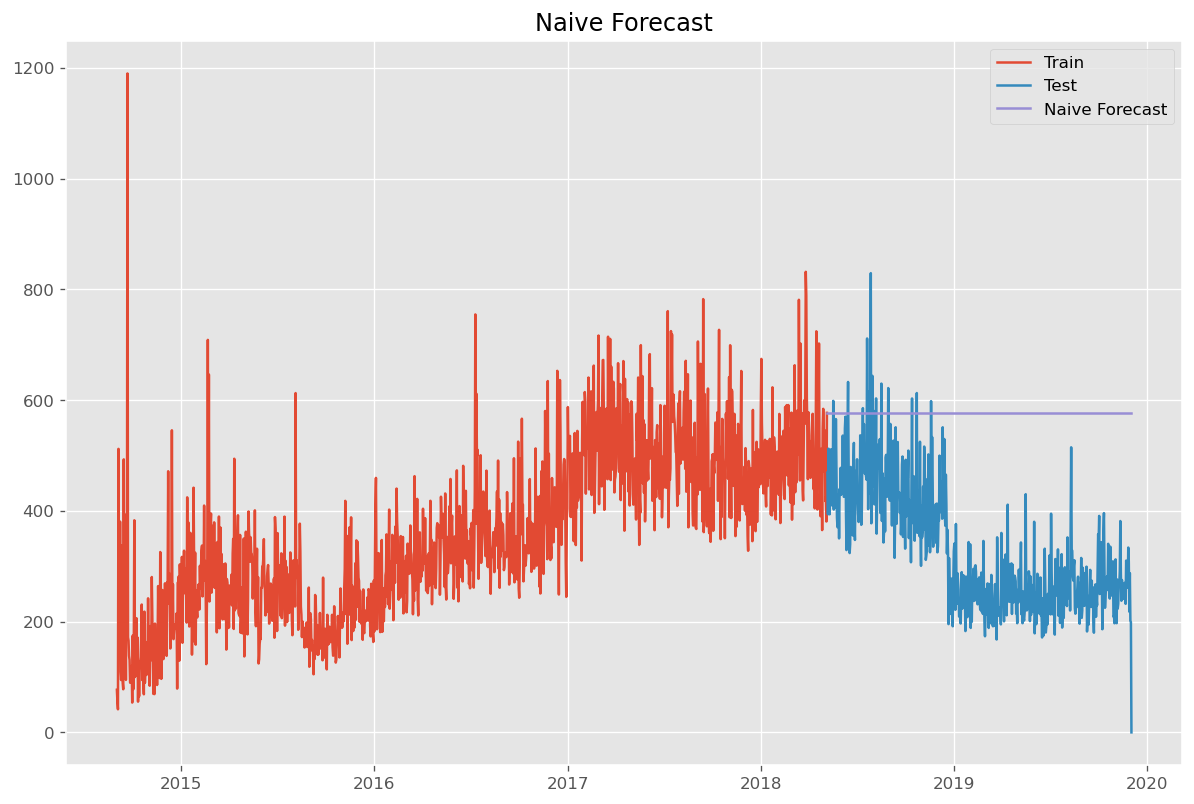

In [243]:
dd= np.asarray(trainset.Observed)
y_hat = testset.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(trainset.index, trainset['Observed'], label='Train')
plt.plot(testset.index,testset['Observed'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [219]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

mse_naive = mean_squared_error(testset.Observed, y_hat.naive)
print("Naive forecast MSE: %f" % (mse))
mape_naive = mean_absolute_percentage_error(testset.Observed, y_hat.naive)
print("Naive forecast MAPE: %f" % (mape))


Naive forecast MSE: 40500.711534
Naive forecast MAPE: 3891825798079374.500000


### Simple average forecast

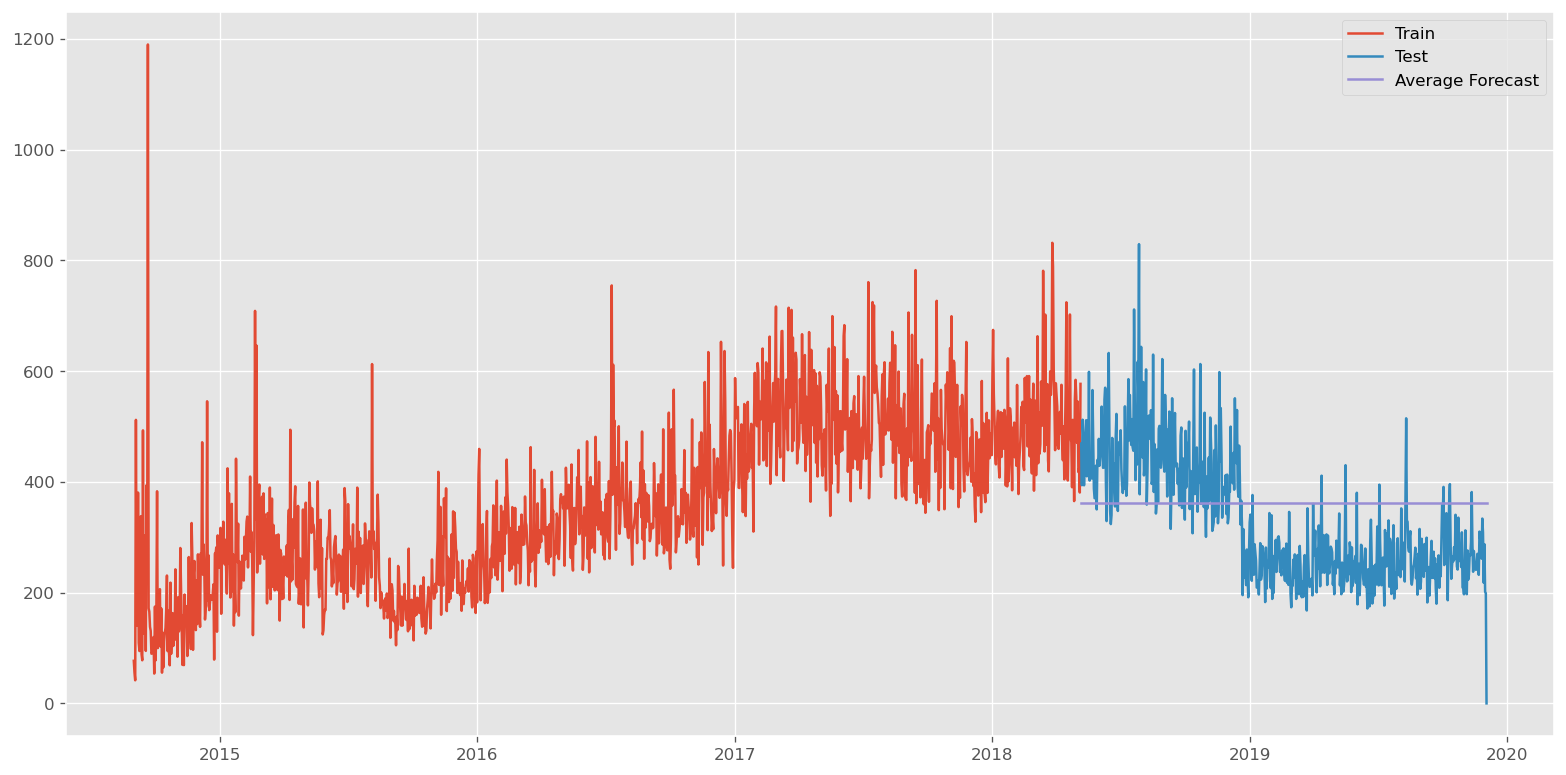

In [256]:
y_hat_avg = testset.copy()
y_hat_avg['avg_forecast'] = trainset['Observed'].mean()
plt.figure(figsize=(16,8))
plt.plot(trainset['Observed'], label='Train')
plt.plot(testset['Observed'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [257]:
mse_average = mean_squared_error(testset.Observed, y_hat_avg.avg_forecast)
print("Simple average MSE: %f" % (mse_average))
mape_average = mean_absolute_percentage_error(testset.Observed, y_hat_avg.avg_forecast)
print("Simple average MAPE: %f" % (mape_average))

Simple average MSE: 13333.904245
Simple average MAPE: 2825187969291605.500000


### ARIMA model

In [178]:
def test_stationarity(timeseries):
    rcParams['figure.figsize'] = 14, 7
    rolmean = timeseries.rolling(12).mean() #allows you to calculate moving avg
    rolstd = timeseries.rolling(12).std() 
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    print('p-value=', dftest[1])

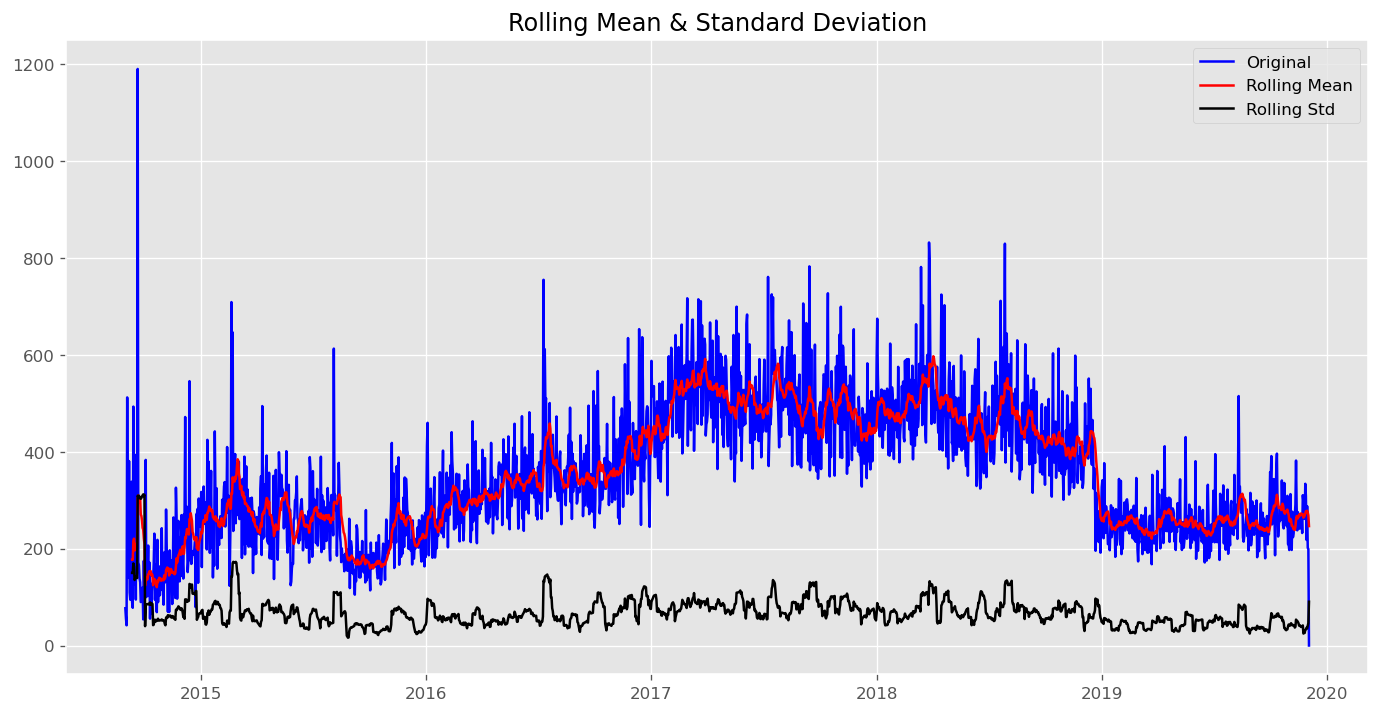

Results of Dickey-Fuller Test:
p-value= 0.48862150583909547


In [179]:
#check to see if the time-series is stationary or non-stationary
test_stationarity(likecount_bydate)
#p-value= 0.48862150583909547

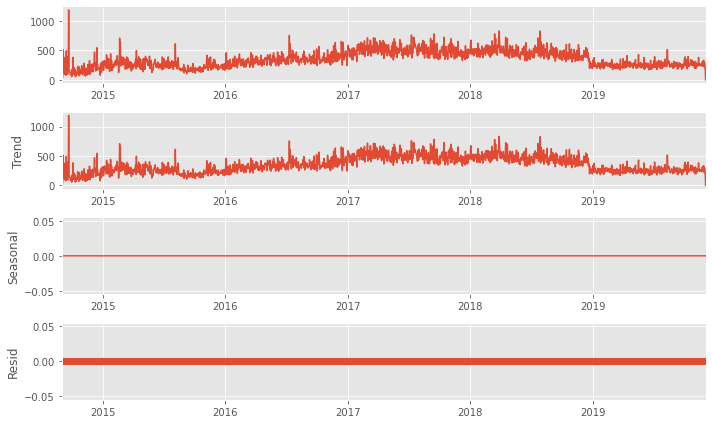

In [22]:
result = seasonal_decompose(likecount_bydate, model='additive', period=1)
result.plot()
pyplot.show()

### Since the original data is not stationary, it needs differencing. The result below suggests differencing once is enough to achieve stationary (d = 1 in the ARIMA model)

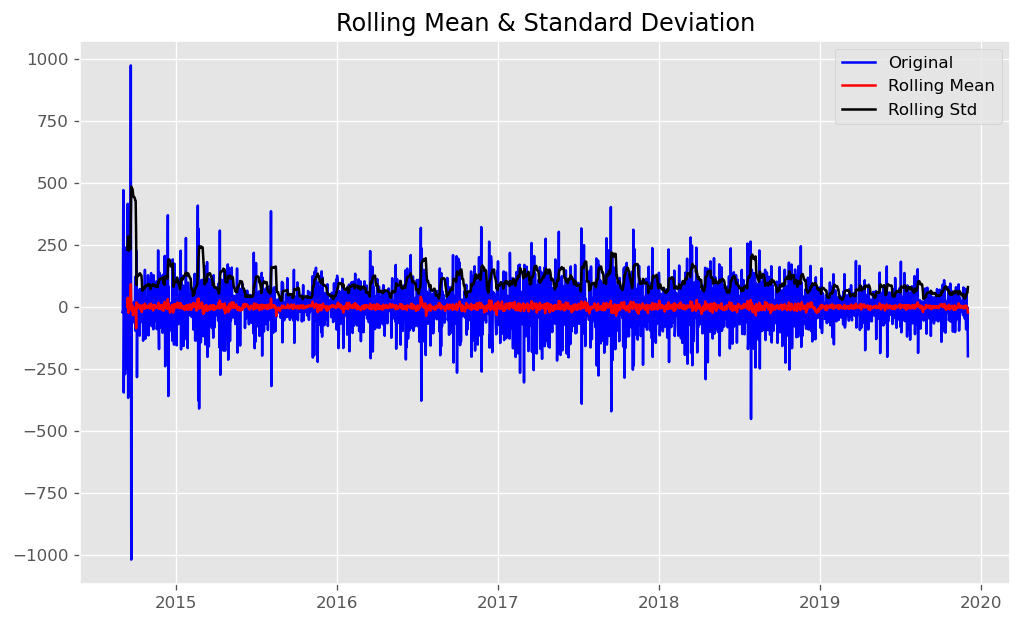

Results of Dickey-Fuller Test:
p-value= 3.227728858414758e-24


In [130]:
#show the decomposition plot after differencing one time
likecount_bydate2 = likecount_bydate.diff()
likecount_bydate2 = likecount_bydate2.iloc[1:]

#check to see if the time-series is stationary or non-stationary
test_stationarity(likecount_bydate2)
#p-value < 0.0001

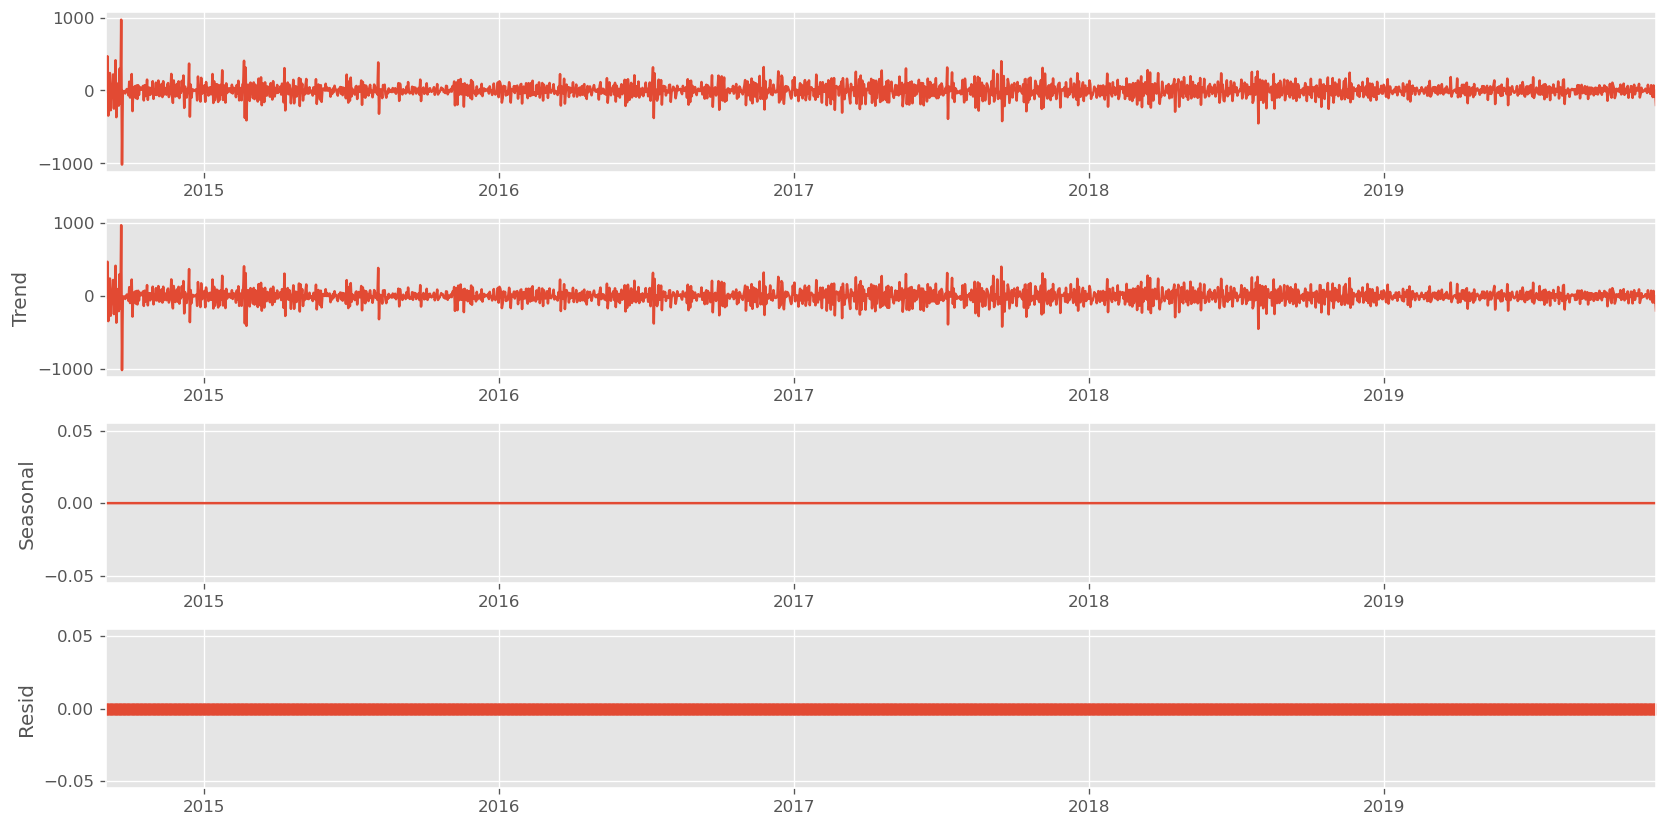

In [185]:
#show the decomposition plot after differencing one time
likecount_bydate2 = likecount_bydate.diff()
likecount_bydate2 = likecount_bydate2.iloc[1:]
result = seasonal_decompose(likecount_bydate2, model='additive', period=1)
result.plot()
pyplot.show()

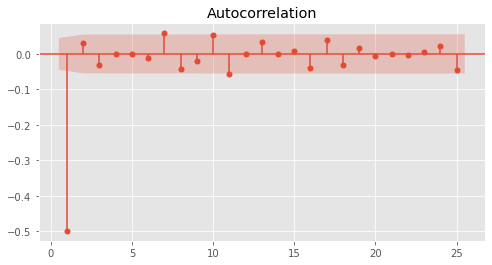

In [34]:
#ACF result suggests q = 1

from statsmodels.graphics.tsaplots import plot_acf
fig,ax = plt.subplots(1,1,figsize=(8,4))
plot_acf(likecount_bydate2,ax=ax,zero=False,lags=25)
plt.show()

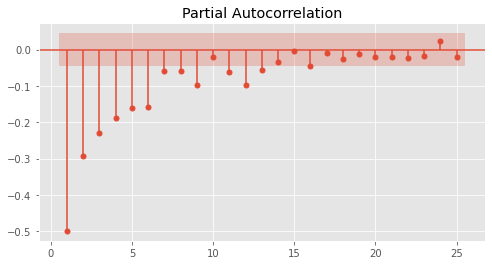

In [36]:
#PACF result suggests p = 13

fig,ax = plt.subplots(1,1,figsize=(8,4))
plot_pacf(likecount_bydate2, ax=ax,zero=False,lags=25)
plt.show()

In [77]:
def performance(y_true, y_pred): 
    mse = ((y_pred - y_true) ** 2).mean()
    mape= np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    performance_data= {'MSE':round(mse, 2),
                       'MAPE':round(mape, 2)
                      }
    return performance_data

In [264]:
from statsmodels.tsa.arima_model import ARIMA
model_arima = ARIMA(trainset, order = (13,1,1))
model_arima_fit = model_arima.fit(disp=False)
arima_predict = model_arima_fit.predict(start=pd.to_datetime('2018-05-07'), end=pd.to_datetime('2019-12-03')
                                           ,dynamic=False)

/Users/cairo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/cairo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [265]:
print(model_arima_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:             D.Observed   No. Observations:                 1343
Model:                ARIMA(13, 1, 1)   Log Likelihood               -7853.178
Method:                       css-mle   S.D. of innovations             83.749
Date:                Sun, 03 Oct 2021   AIC                          15738.355
Time:                        17:47:43   BIC                          15821.598
Sample:                    09-02-2014   HQIC                         15769.538
                         - 05-06-2018                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2363      0.166      1.419      0.156      -0.090       0.562
ar.L1.D.Observed      0.0502      0.039      1.295      0.195      -0.026       0.126
ar.L2.D.Observed      0.

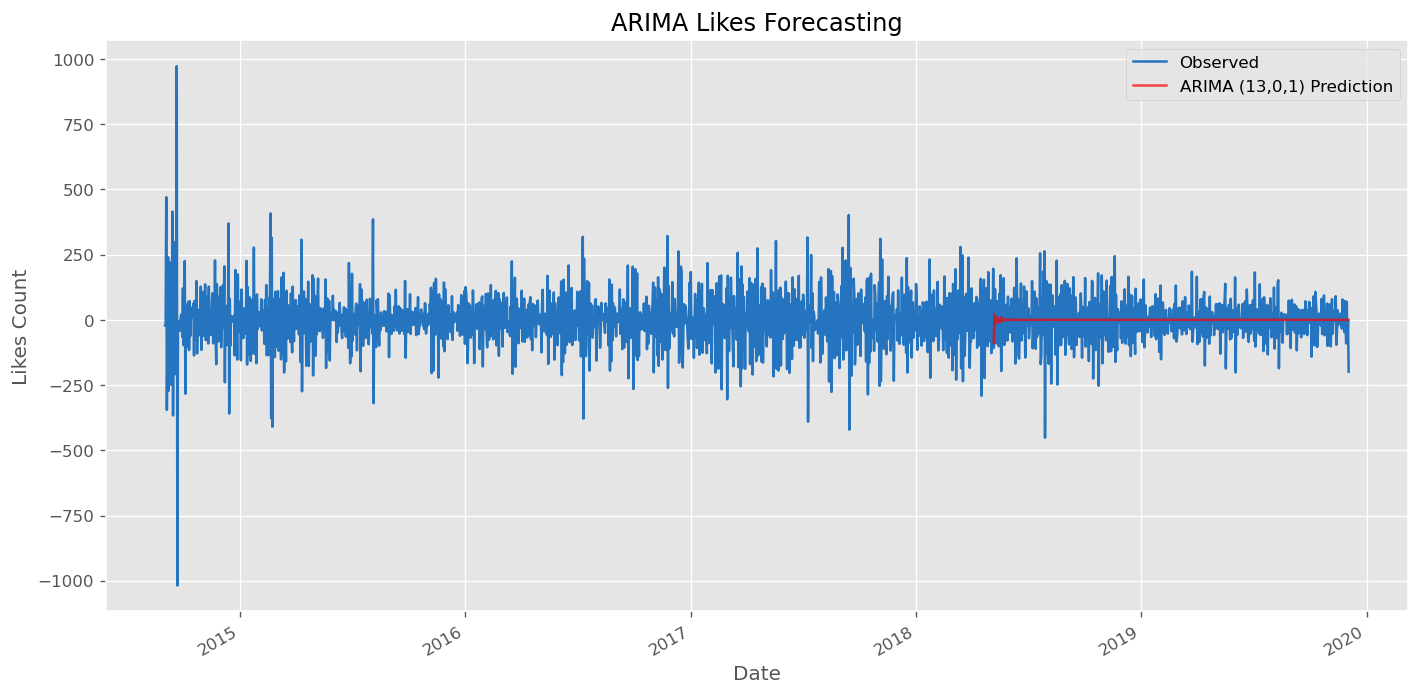

In [208]:
#observed plot
ax = likecount_bydate2.plot(label='Observed',color='#2574BF')
#predicted plot
rcParams['figure.figsize'] = 14, 7
arima_predict.plot(ax=ax, label='ARIMA (13,0,1) Prediction', alpha= 0.7, color='red') 
plt.title('ARIMA Likes Forecasting')
plt.xlabel('Date')
plt.ylabel('Likes Count')
plt.legend()
plt.show()

In [197]:
arima_results= performance(testset.Observed,arima_predict)
arima_results

{'MSE': 6630.75, 'MAPE': 101.35}

### Clearly, the ARIMA model performed much better than the naive model and the simple moving average model

## Analyze the time series with month as the time unit

In [259]:
df.likeCount = pd.to_numeric(df["likeCount"], downcast="float")
df["datetime"] = pd.to_datetime(df["publicTime"])
#df['date'] = df['datetime'].dt.date
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
#df['month_year'] = df['datetime'].dt.to_period('M')

#df["month_year"] = df["month_year"].to_timestamp()


df['date_month'] = pd.to_datetime(df[['year', 'month']].assign(DAY=1))

likecount_bymonth = df.groupby(["date_month"])[['likeCount']].mean()

In [260]:
likecount_bymonth

,likeCount
date_month,
2014-09-01,201.692001
2014-10-01,140.150818
2014-11-01,170.942657
2014-12-01,230.653870
2015-01-01,262.103821
...,...
2019-08-01,273.183777
2019-09-01,242.955322
2019-10-01,282.119202


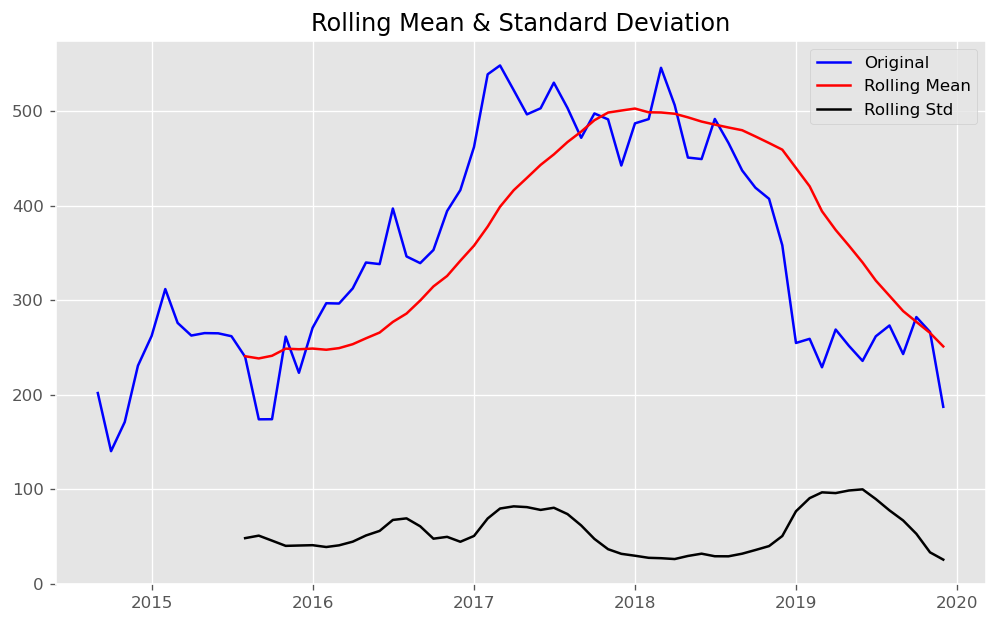

Results of Dickey-Fuller Test:
p-value= 0.6444350365913349


In [128]:
#check to see if the time-series is stationary or non-stationary
test_stationarity(likecount_bymonth.likeCount)
#p-value= 0.48862150583909547

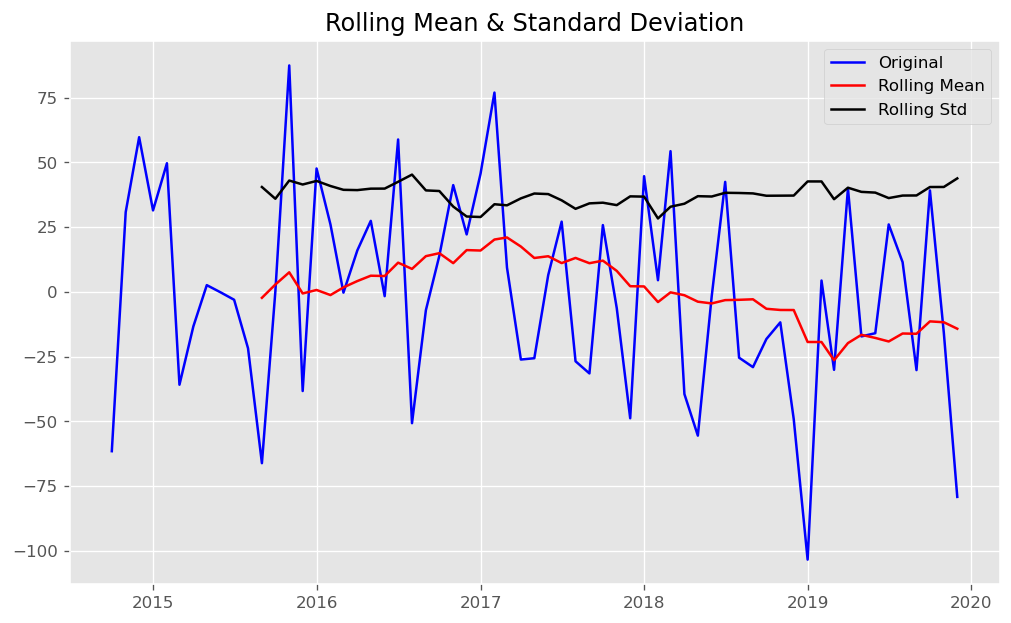

Results of Dickey-Fuller Test:
p-value= 2.144411485453549e-10


In [131]:
#show the decomposition plot after differencing one time
likecount_bymonth2 = likecount_bymonth.diff()
likecount_bymonth2 = likecount_bymonth2.iloc[1:]

#check to see if the time-series is stationary or non-stationary
test_stationarity(likecount_bymonth2)

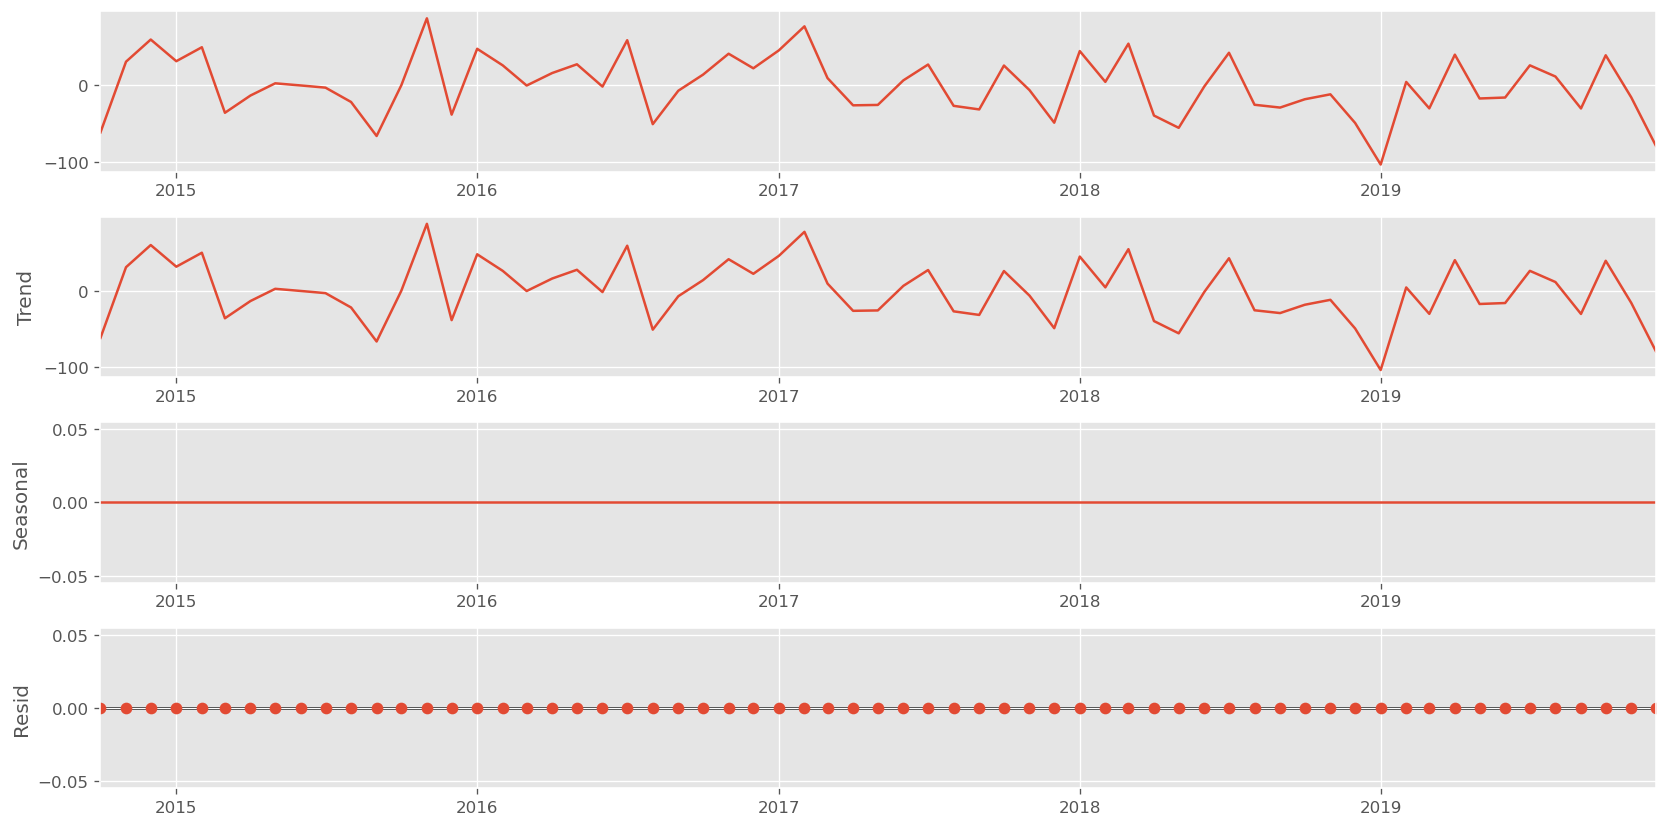

In [224]:
#show the decomposition plot after differencing one time
result = seasonal_decompose(likecount_bymonth2, model='additive', period=1)
result.plot()
pyplot.show()

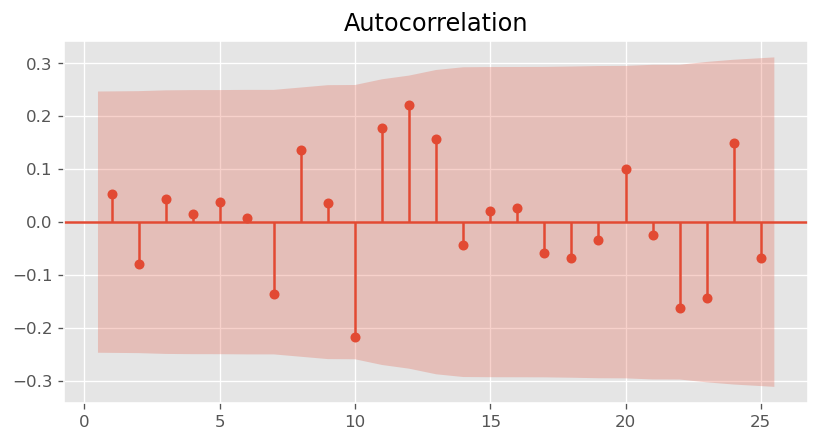

In [225]:
#ACF result suggests q = 0

from statsmodels.graphics.tsaplots import plot_acf
fig,ax = plt.subplots(1,1,figsize=(8,4))
plot_acf(likecount_bymonth2,ax=ax,zero=False,lags=25)
plt.show()

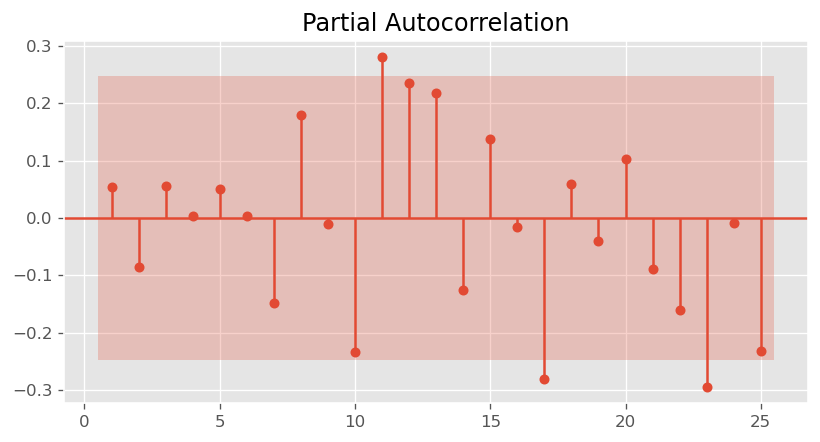

In [226]:
#PACF result suggests p = 23

fig,ax = plt.subplots(1,1,figsize=(8,4))
plot_pacf(likecount_bymonth2, ax=ax,zero=False,lags=25)
plt.show()

In [227]:
likecount_bymonth = likecount_bymonth.rename(columns={'likeCount': 'Observed'})
likecount_bymonth2 = likecount_bymonth2.rename(columns={'likeCount': 'Observed'})                  
                                        
train_size = int(len(likecount_bymonth) * 0.7)
trainset, testset= likecount_bymonth[0:train_size], likecount_bymonth[train_size:]

In [228]:
testset

,Observed
date_month,
2018-05-01,450.930542
2018-06-01,449.334625
2018-07-01,491.789429
2018-08-01,466.360077
2018-09-01,437.276855
2018-10-01,419.055786
2018-11-01,407.267975
2018-12-01,358.107269
2019-01-01,254.690018


In [234]:
from statsmodels.tsa.arima_model import ARIMA
model_arima = ARIMA(trainset, order = (23,1,0))
model_arima_fit = model_arima.fit(disp=False)
arima_predict = model_arima_fit.predict(start=pd.to_datetime('2018-04-01'), end=pd.to_datetime('2019-12-01')
                                           ,dynamic=False)


/Users/cairo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/cairo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/cairo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/Users/cairo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


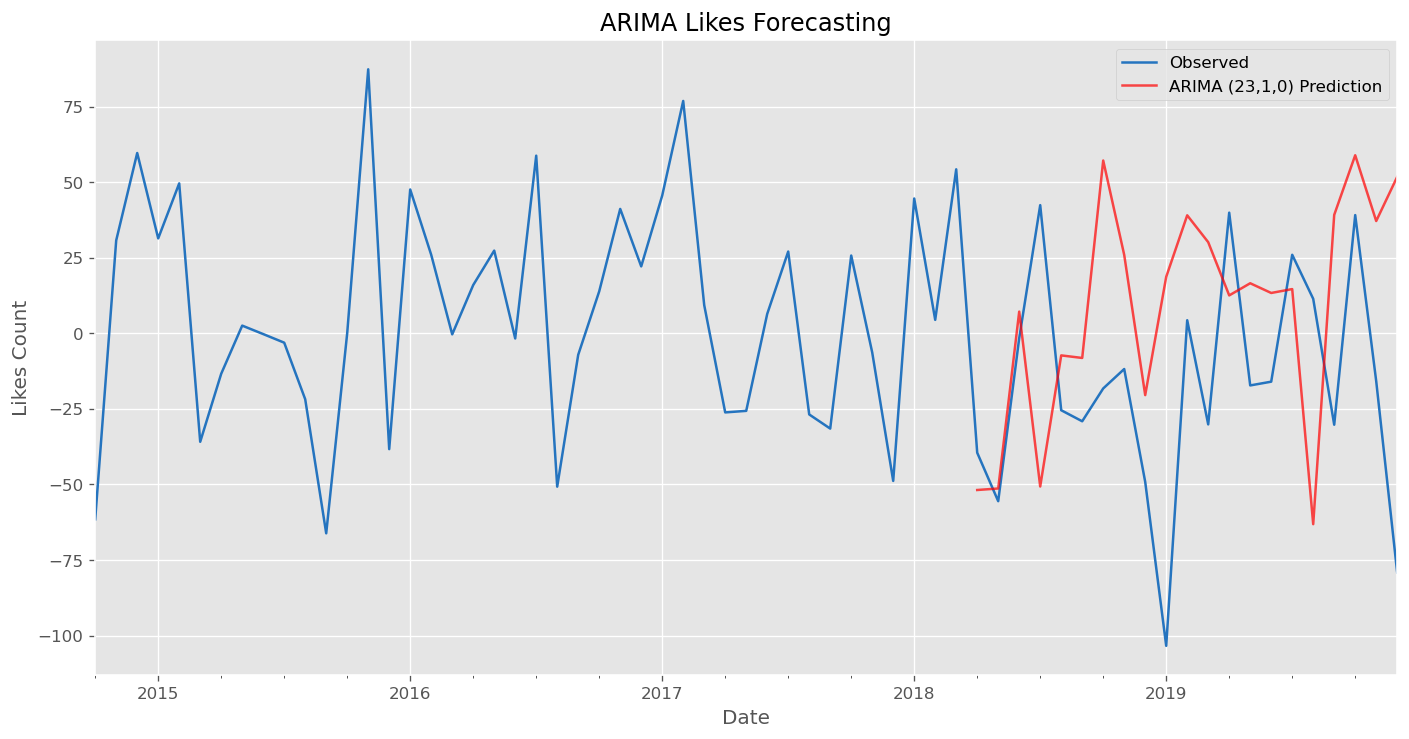

In [235]:
#observed plot
ax = likecount_bymonth2.plot(label='Observed',color='#2574BF')
#predicted plot
rcParams['figure.figsize'] = 14, 7
arima_predict.plot(ax=ax, label='ARIMA (23,1,0) Prediction', alpha= 0.7, color='red') 
plt.title('ARIMA Likes Forecasting')
plt.xlabel('Date')
plt.ylabel('Likes Count')
plt.legend()
plt.show()

In [236]:
arma_results= performance(testset.Observed,arima_predict)
arma_results

{'MSE': 111725.21, 'MAPE': 94.77}

### Show the forecast result at the original time series by reverse differencing the predicted value

In [237]:
def rebuild_diffed(series, first_element_original):
    cumsum = series.cumsum()
    return cumsum.fillna(0) + first_element_original

In [238]:
rebuilt = rebuild_diffed(arima_predict, testset.Observed[0])

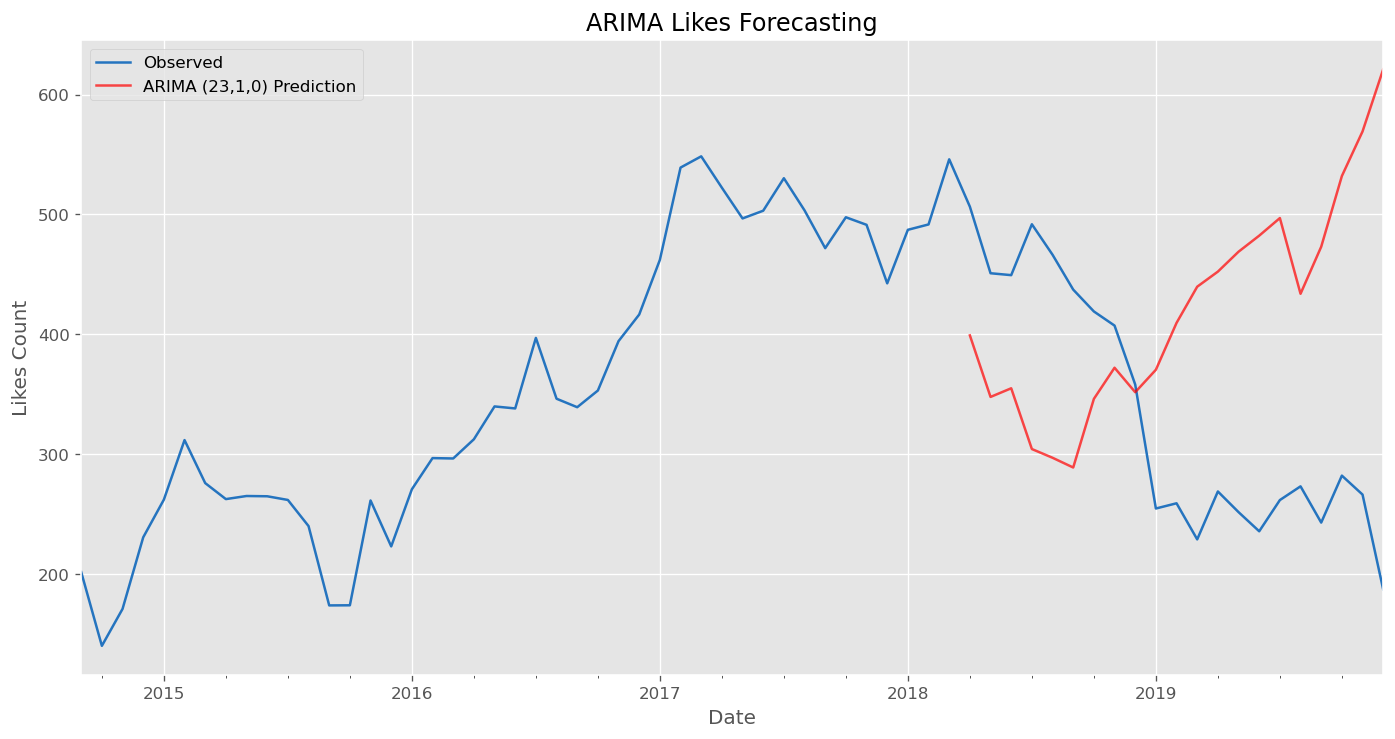

In [239]:
#observed plot
ax = likecount_bymonth.plot(label='Observed',color='#2574BF')
#predicted plot
rcParams['figure.figsize'] = 14, 7
rebuilt.plot(ax=ax, label='ARIMA (23,1,0) Prediction', alpha= 0.7, color='red') 
plt.title('ARIMA Likes Forecasting')
plt.xlabel('Date')
plt.ylabel('Likes Count')
plt.legend()
plt.show()